In [15]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

import time

In [2]:
# Create a set of random latitude and longitude combinations.
# When we run this cell, the output is a zip object in memory.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

652

In [6]:
print(citipy.nearest_city(25.12903645, -67.59741259).city_name)

cockburn town


In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tyukalinsk
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | simnas
Processing Record 7 of Set 1 | deputatskiy
Processing Record 8 of Set 1 | vao
Processing Record 9 of Set 1 | half moon bay
Processing Record 10 of Set 1 | mehamn
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | tuktoyaktuk
Processing Record 14 of Set 1 | tual
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | goma
Processing Record 17 of Set 1 | labrea
Processing Record 18 of Set 1 | mwinilunga
Processing Record 19 of Set 1 | olafsvik
Processing Record 20 of Set 1 | cape town
Processing Record 21 of Set 1 | muros
Processing Record 22 of Set 1 | san patricio
Processing Record 23 of Set 1 | mahebourg
Process

Processing Record 36 of Set 4 | zapolyarnyy
Processing Record 37 of Set 4 | santiago
Processing Record 38 of Set 4 | yiyang
Processing Record 39 of Set 4 | butaritari
Processing Record 40 of Set 4 | kudahuvadhoo
Processing Record 41 of Set 4 | ercis
Processing Record 42 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 43 of Set 4 | tarudant
City not found. Skipping...
Processing Record 44 of Set 4 | binga
Processing Record 45 of Set 4 | arraial do cabo
Processing Record 46 of Set 4 | saldanha
Processing Record 47 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 48 of Set 4 | peace river
Processing Record 49 of Set 4 | upington
Processing Record 50 of Set 4 | langsa
Processing Record 1 of Set 5 | high rock
Processing Record 2 of Set 5 | fortuna
Processing Record 3 of Set 5 | lorengau
Processing Record 4 of Set 5 | nanortalik
Processing Record 5 of Set 5 | itoman
Processing Record 6 of Set 5 | cidreira
Processing Record 7 of Set 5 | tasiilaq
Proces

Processing Record 24 of Set 8 | salalah
Processing Record 25 of Set 8 | palo alto
Processing Record 26 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 27 of Set 8 | yar-sale
Processing Record 28 of Set 8 | khorixas
Processing Record 29 of Set 8 | belaya gora
Processing Record 30 of Set 8 | rio gallegos
Processing Record 31 of Set 8 | lata
Processing Record 32 of Set 8 | tevriz
Processing Record 33 of Set 8 | we
City not found. Skipping...
Processing Record 34 of Set 8 | puerto madryn
Processing Record 35 of Set 8 | mandera
Processing Record 36 of Set 8 | vargashi
Processing Record 37 of Set 8 | ndjole
Processing Record 38 of Set 8 | strezhevoy
Processing Record 39 of Set 8 | asau
Processing Record 40 of Set 8 | tall kayf
Processing Record 41 of Set 8 | tilichiki
Processing Record 42 of Set 8 | katsuura
Processing Record 43 of Set 8 | ballina
Processing Record 44 of Set 8 | aksarka
Processing Record 45 of Set 8 | paralimni
Processing Record 46 of Set 8 | honiara
Proces

Processing Record 11 of Set 12 | atsiki
City not found. Skipping...
Processing Record 12 of Set 12 | saint-joseph
Processing Record 13 of Set 12 | ust-maya
Processing Record 14 of Set 12 | sao joao da barra
Processing Record 15 of Set 12 | cabinda
Processing Record 16 of Set 12 | yarada
Processing Record 17 of Set 12 | pozo colorado
Processing Record 18 of Set 12 | meulaboh
Processing Record 19 of Set 12 | matara
Processing Record 20 of Set 12 | otradnoye
Processing Record 21 of Set 12 | praya
Processing Record 22 of Set 12 | kaeo
Processing Record 23 of Set 12 | vostok
Processing Record 24 of Set 12 | sobolevo
Processing Record 25 of Set 12 | teguldet
Processing Record 26 of Set 12 | mangrol
Processing Record 27 of Set 12 | suzu
City not found. Skipping...
Processing Record 28 of Set 12 | uray
Processing Record 29 of Set 12 | zaysan
Processing Record 30 of Set 12 | husavik
Processing Record 31 of Set 12 | fort nelson
Processing Record 32 of Set 12 | erenhot
Processing Record 33 of Set

In [9]:
len(city_data)

598

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tyukalinsk,55.87,72.20,74.68,48,65,16.51,RU,2020-05-25 21:19:23
1,Port Alfred,-33.59,26.89,61.00,44,3,11.99,ZA,2020-05-25 21:19:23
2,Kapaa,22.08,-159.32,84.99,74,1,5.82,US,2020-05-25 21:19:24
3,Mataura,-46.19,168.86,45.34,90,100,2.35,NZ,2020-05-25 21:19:24
4,Busselton,-33.65,115.33,48.99,95,92,10.51,AU,2020-05-25 21:19:24
5,Simnas,54.40,23.65,50.00,76,80,5.46,LT,2020-05-25 21:19:25
6,Deputatskiy,69.30,139.90,37.36,97,98,3.24,RU,2020-05-25 21:19:25
7,Vao,-22.67,167.48,73.78,78,94,10.58,NC,2020-05-25 21:19:25
8,Half Moon Bay,37.46,-122.43,93.00,77,1,8.05,US,2020-05-25 21:19:25
9,Mehamn,71.04,27.85,44.60,65,23,9.17,NO,2020-05-25 21:19:25


In [11]:
new_column_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

city_data_df=city_data_df[new_column_order]

city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tyukalinsk,RU,2020-05-25 21:19:23,55.87,72.20,74.68,48,65,16.51
1,Port Alfred,ZA,2020-05-25 21:19:23,-33.59,26.89,61.00,44,3,11.99
2,Kapaa,US,2020-05-25 21:19:24,22.08,-159.32,84.99,74,1,5.82
3,Mataura,NZ,2020-05-25 21:19:24,-46.19,168.86,45.34,90,100,2.35
4,Busselton,AU,2020-05-25 21:19:24,-33.65,115.33,48.99,95,92,10.51
...,...,...,...,...,...,...,...,...,...
593,Manyana,BW,2020-05-25 21:22:14,-23.40,21.72,53.87,42,0,1.79
594,Tulsipur,NP,2020-05-25 21:20:29,28.13,82.30,80.71,16,0,5.61
595,Nago,JP,2020-05-25 21:22:14,26.59,127.98,71.60,100,1,3.36
596,Totskoye,RU,2020-05-25 21:22:14,52.52,52.76,50.29,79,0,7.38


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

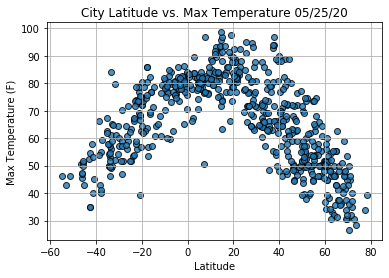

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

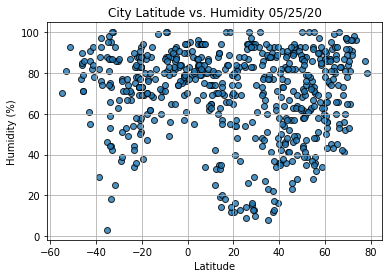

In [17]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

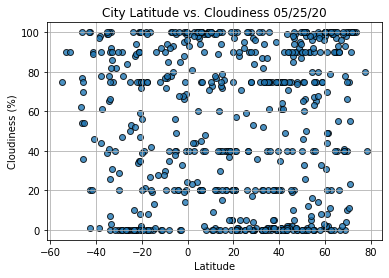

In [18]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

In [ ]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()